DO EPIC
# **Data Wrangling in Python with Pandas**
Get your detailed answers for What, Why, and How?

 --  A notebook by Ajay Chouhan

 You can read my blog on the same topic [here](https://medium.com/@ajay-chouhan/data-wrangling-in-python-with-pandas-e383d583beac).

We all come to the point in our Data Science journey where we have the complex uncleaned raw data and we want to transform it into a structured presentable dataset so that we can perform our Analysis on top of it. And, Data wrangling is the process to do so. Let’s take a look at some definitions:

According to the Altair website:

*“Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis. With the amount of data and data sources rapidly growing and expanding, it is getting increasingly essential for large amounts of available data to be organized for analysis.”*

or in other words,

*“Data wrangling or data munging is the process of gathering, sorting, and transforming data from an original “raw” format, in order to prepare it for analysis and other downstream processes.”*

Pandas is one of the most used Python libraries to handle datasets by the Data Science community. So let’s start our journey to use Pandas as our Data Wrangling tool.

Fasten your belts, because it will be a long and adventurous journey. But once it will be over then you will become a better Data Wrangler.

I have written this blog to explain the Data Wrangling process in an easier and simplified way with the help of Pandas library.

# Index:

1. Create Dataframes

    1.1. With Dictionary

    1.2. With List of lists

    1.3. Creating a MultiIndex (Hierarchical index) object

2. Tidy Data

3. Reshaping the Data

    3.1. Melt

    3.2. Pivot

    3.3. Concate

        3.3.1. Vertical Concate
        3.3.2. Horizontal Concate

    3.4. Sort values (or Order values)
    
        3.4.1. Sorting rows by values of columns (low to high)
        3.4.2. Sorting rows by values of columns (high to low)

    3.5. Sorting the Index of Dataframe

    3.6. Reset the Index

    3.7. Drop columns from DataFrame 
    
    3.8. Rename the columns of a DataFrame

4. Subset Rows

    4.1. Subset rows with logical criteria

    4.2. Remove Duplicate rows

    4.3. Select first n rows

    4.4. Select last n rows

    4.5. Randomly select rows

        4.5.1. By Fraction: Randomly select rows
        4.5.2. By Number: Randomly select rows

    4.6. Select rows by position

    4.7. Select and order top n entries

    4.8. Select and order bottom n entries

5. Subset Columns

    5.1. Select single column with specific name

    5.2. Select multiple columns with specific names

    5.3. Select columns whose name matches regular expression regex

    5.4. Select all columns between specific column names

    5.5. Select columns with positions (index of columns)

6. Method Chaining

7. Summarize Data

    7.1. Count number of rows with each unique value of variable (feature)

    7.2. Check the number of rows in DataFrame

    7.3. Check number of unique values in any column

    7.4. Basic descriptive statistics for each Numeric column

    7.5. Summary functions

8. Group Data with Groupby function

9. Handling Missing Data

    9.1. Dropping rows with NaN values

    9.2. Replacing NaN values in respective Columns

10. Make New Columns

    10.1. Compute and append one or more new columns

    10.2. Create new column with List

    10.3. Bin column into n buckets


11. Combine Data Sets with Merge (as Joins in SQL)

    11.1. Left Join

    11.2. Right Join

    11.3. Inner Join

    11.4. Outer Join
    
    11.5. Filtering Joins

12. Set-like Operations
    
    12.1. Intersection
    
    12.2. Union
    
    12.3. Setdiff

13. Windows

14. Plotting
    
    14.1. Histogram
    
    14.2. Scatter Plot



# **Data Wrangling with Pandas**

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np

# 1. Create Dataframes

## 1.1. With Dictionary
Where dictionary keys are column names (headers) and dictionary values are values of respected columns

In [ ]:
df = pd.DataFrame(
                {"Age": [23, 47, 47],
                 "Sex": ['F', 'M', 'M'],
                 "BP":  ['HIGH', 'LOW', 'LOW'],
                 "Cholesterol": ['HIGH', 'HIGH', 'HIGH'],
                 "Na_to_K": [25.355, 13.093, 10.114],
                 "Drug": ['drugY', 'drugC', 'drugC']
                 
                },
                index = [11,12,13]
)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
11,23,F,HIGH,HIGH,25.355,drugY
12,47,M,LOW,HIGH,13.093,drugC
13,47,M,LOW,HIGH,10.114,drugC


## 1.2. With List of lists
Specify values of each row

In [ ]:
df = pd.DataFrame(
                [[23, 'F', 'HIGH', 'HIGH', 25.355, 'drugY'], 
                 [47, 'M', 'LOW', 'HIGH', 13.093, 'drugC'], 
                 [47, 'M', 'LOW', 'HIGH', 10.113999999999999, 'drugC']],
                index = ["string01","string02","string03"],
                columns = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
string01,23,F,HIGH,HIGH,25.355,drugY
string02,47,M,LOW,HIGH,13.093,drugC
string03,47,M,LOW,HIGH,10.114,drugC


## 1.3. Creating a MultiIndex (Hierarchical index) object

In [ ]:
df = pd.DataFrame(
                [[23, 'F', 'HIGH', 'HIGH', 25.355, 'drugY'], 
                 [47, 'M', 'LOW', 'LOW', 13.093, 'drugC'], 
                 [47, 'M', 'LOW', 'HIGH', 10.113999999999999, 'drugC']],
                index = pd.MultiIndex.from_tuples([("F","HIGH"), ("M",	"LOW"), ("M", "HIGH")],names=['s',"chole"]),
                columns = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
)
df

Age Sex    BP Cholesterol  Na_to_K   Drug
s chole                                           
F HIGH    23   F  HIGH        HIGH   25.355  drugY
M LOW     47   M   LOW         LOW   13.093  drugC
  HIGH    47   M   LOW        HIGH   10.114  drugC

In [ ]:
df.loc["M","LOW"]

Age                47
Sex                 M
BP                LOW
Cholesterol       LOW
Na_to_K        13.093
Drug            drugC
Name: (M, LOW), dtype: object

In [ ]:
# indexing in multi-index object
df.loc[("M","LOW"),"Age"] # or df.loc[("M","LOW")]["Age"]

47

# 2. Tidy Data
In tidy data: Every column is a variable. Every row is an observation. Generally we deal with tidy data only.

In [ ]:
# reading csv file directly from the web link
df_sale = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/med_doz_pending/Metro_med_doz_pending_uc_sfrcondo_month.csv",low_memory=False)

In [ ]:
df_sale.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,102001,0,United States,Country,NaN,42.0,25.0,22.0,19.0,20.0,...,7.0,9.0,10.0,11.0,11.0,12.0,15.0,11.0,8.0,7.0
1,394913,1,"New York, NY",Msa,NY,65.0,39.0,35.0,35.0,34.0,...,25.0,28.0,29.0,32.0,32.0,38.0,40.0,47.0,25.0,21.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,21.0,14.0,16.0,15.0,16.0,...,11.0,12.0,13.0,13.0,13.0,13.0,14.0,12.0,10.0,10.0
3,394463,3,"Chicago, IL",Msa,IL,50.0,23.0,16.0,17.0,16.0,...,8.0,10.0,12.0,15.0,17.0,21.0,28.0,21.0,8.0,7.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,36.0,24.0,23.0,20.0,21.0,...,14.0,14.0,16.0,18.0,17.0,17.0,19.0,17.0,13.0,6.0


In the above output we can see that there are many dates are presented as columns/feature of the dataset. Which is increasing the complexity. We can modify this data into a tidy data with the help of pd.melt() function.

In [ ]:
df_sale.shape

(766, 56)

In [ ]:
# id_vars parameter - where we do not want to change anything
# var_name - what should be the variable/column name for all dates
# value_name - column where we will store the cell values

df_melted = pd.melt(frame=df_sale, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name="year-month-day",value_name="count")

df_melted.head()
# following is the tidy data

,RegionID,SizeRank,RegionName,RegionType,StateName,year-month-day,count
0,102001,0,United States,Country,NaN,2018-01-31,42.0
1,394913,1,"New York, NY",Msa,NY,2018-01-31,65.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2018-01-31,21.0
3,394463,3,"Chicago, IL",Msa,IL,2018-01-31,50.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,2018-01-31,36.0


In [ ]:
# lets pick all the values of year, month and day separately
df_melted['year-month-day'].str.split("-").head()

0    [2018, 01, 31]
1    [2018, 01, 31]
2    [2018, 01, 31]
3    [2018, 01, 31]
4    [2018, 01, 31]
Name: year-month-day, dtype: object

In [ ]:
# better way is to obtain a dataframe 
# use expand=True argument
df_melted['year-month-day'].str.split("-",expand=True).head()

,0,1,2
0,2018,01,31
1,2018,01,31
2,2018,01,31
3,2018,01,31
4,2018,01,31


In [ ]:
# Adding the above obtained data frame to our original dataset
df_melted[['year','month','day']] = df_melted['year-month-day'].str.split("-",expand=True)
df_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,year-month-day,count,year,month,day
0,102001,0,United States,Country,NaN,2018-01-31,42.0,2018,01,31
1,394913,1,"New York, NY",Msa,NY,2018-01-31,65.0,2018,01,31
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2018-01-31,21.0,2018,01,31
3,394463,3,"Chicago, IL",Msa,IL,2018-01-31,50.0,2018,01,31
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,2018-01-31,36.0,2018,01,31


In [ ]:
# Dropping redundant 'year-month-day' column
df_melted.drop(columns=['year-month-day'],inplace=True, axis=1)
df_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,count,year,month,day
0,102001,0,United States,Country,NaN,42.0,2018,01,31
1,394913,1,"New York, NY",Msa,NY,65.0,2018,01,31
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,21.0,2018,01,31
3,394463,3,"Chicago, IL",Msa,IL,50.0,2018,01,31
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,36.0,2018,01,31


In [ ]:
# in df_melted data frame each column is a feature and each row is an observation (or data point)

# 3. Reshaping the Data

Let's use a new dataset here. Drug200 dataset is available [here](https://www.kaggle.com/datasets/jeevanrh/drug200csv) on Kaggle.

In [ ]:
# reading the csv file and printing first 5 rows
data = pd.read_csv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## 3.1. Melt

In [ ]:
# We are using pd.melt() to obtain a dataset with Variable and its value columns
melt_df = pd.melt(data)
melt_df

,variable,value
0,Age,23
1,Age,47
2,Age,47
3,Age,28
4,Age,61
...,...,...
1195,Drug,drugC
1196,Drug,drugC
1197,Drug,drugX
1198,Drug,drugX


## 3.2. Pivot

In [ ]:
# Using Dataframe.pivot() to obtain all the variables in different columns
# since real relation is gone through pd.melt() function, so we can not gain the original dataframe
pivot_df = melt_df.pivot(columns='variable',values='value')
pivot_df

variable,Age,BP,Cholesterol,Drug,Na_to_K,Sex
0,23,NaN,NaN,NaN,NaN,NaN
1,47,NaN,NaN,NaN,NaN,NaN
2,47,NaN,NaN,NaN,NaN,NaN
3,28,NaN,NaN,NaN,NaN,NaN
4,61,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1195,NaN,NaN,NaN,drugC,NaN,NaN
1196,NaN,NaN,NaN,drugC,NaN,NaN
1197,NaN,NaN,NaN,drugX,NaN,NaN
1198,NaN,NaN,NaN,drugX,NaN,NaN


## 3.3. Concate

### 3.3.1. Vertical Concate

In [ ]:
# printing shapes of data and pivot_df dataframes

print("shape of dataframe 'data'",data.shape)
print("shape of dataframe 'pivot_df'",pivot_df.shape)

# using data and pivot_df dataframes to show Vertical concate function
# Vertical concatenation
# number of columns should be same

vertical_concate_df = pd.concat([data,pivot_df]) 
vertical_concate_df

shape of dataframe 'data' (200, 6)
shape of dataframe 'pivot_df' (1200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
1195,NaN,NaN,NaN,NaN,NaN,drugC
1196,NaN,NaN,NaN,NaN,NaN,drugC
1197,NaN,NaN,NaN,NaN,NaN,drugX
1198,NaN,NaN,NaN,NaN,NaN,drugX


In [ ]:
# shape of concatenated dataframe
print("shape of dataframe 'vertical_concate_df':",vertical_concate_df.shape)

shape of dataframe 'vertical_concate_df': (1400, 6)


### 3.3.2. Horizontal Concate 

In [ ]:
# printing shapes of melt_df and pivot_df dataframes

print("shape of dataframe 'melt_df'",melt_df.shape)
print("shape of dataframe 'pivot_df'",pivot_df.shape)

# using melt_df and pivot_df dataframes to show row wise concate function
# Horizontal concatenation
# number of rows should be same

horizontal_concate_df = pd.concat([melt_df,pivot_df],axis=1)
horizontal_concate_df

shape of dataframe 'melt_df' (1200, 2)
shape of dataframe 'pivot_df' (1200, 6)


,variable,value,Age,BP,Cholesterol,Drug,Na_to_K,Sex
0,Age,23,23,NaN,NaN,NaN,NaN,NaN
1,Age,47,47,NaN,NaN,NaN,NaN,NaN
2,Age,47,47,NaN,NaN,NaN,NaN,NaN
3,Age,28,28,NaN,NaN,NaN,NaN,NaN
4,Age,61,61,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1195,Drug,drugC,NaN,NaN,NaN,drugC,NaN,NaN
1196,Drug,drugC,NaN,NaN,NaN,drugC,NaN,NaN
1197,Drug,drugX,NaN,NaN,NaN,drugX,NaN,NaN
1198,Drug,drugX,NaN,NaN,NaN,drugX,NaN,NaN


In [ ]:
print("shape of dataframe 'horizontal_concate_df':",horizontal_concate_df.shape)

shape of dataframe 'horizontal_concate_df': (1200, 8)


## 3.4. Sort values (or Order values)

### 3.4.1. Sorting rows by values of columns (low to high)

In [ ]:
# by default it will give low to high values
data.sort_values(['Age','Na_to_K'])

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
39,15,M,NORMAL,HIGH,9.084,drugX
99,15,F,HIGH,NORMAL,16.725,drugY
121,15,M,HIGH,NORMAL,17.206,drugY
196,16,M,LOW,HIGH,12.006,drugC
15,16,F,HIGH,NORMAL,15.516,drugY
...,...,...,...,...,...,...
40,73,F,NORMAL,HIGH,19.221,drugY
31,74,M,HIGH,HIGH,9.567,drugB
135,74,M,LOW,NORMAL,11.939,drugX
143,74,M,HIGH,NORMAL,15.436,drugY


### 3.4.2. Sorting rows by values of columns (high to low) 

In [ ]:
# Specifying ascending True for Age column and ascending False for Na_to_K column

data.sort_values(['Age','Na_to_K'],ascending=[True,False]) 

# if we will give "ascending=True" then high to low ascending will apply on all the columns selected in the list

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
121,15,M,HIGH,NORMAL,17.206,drugY
99,15,F,HIGH,NORMAL,16.725,drugY
39,15,M,NORMAL,HIGH,9.084,drugX
164,16,M,HIGH,NORMAL,19.007,drugY
15,16,F,HIGH,NORMAL,15.516,drugY
...,...,...,...,...,...,...
175,73,F,HIGH,HIGH,18.348,drugY
13,74,F,LOW,HIGH,20.942,drugY
143,74,M,HIGH,NORMAL,15.436,drugY
135,74,M,LOW,NORMAL,11.939,drugX


## 3.5. Sorting the Index of Dataframe

In [ ]:
df # using df dataframe just to change indices 

Age Sex    BP Cholesterol  Na_to_K   Drug
s chole                                           
F HIGH    23   F  HIGH        HIGH   25.355  drugY
M LOW     47   M   LOW         LOW   13.093  drugC
  HIGH    47   M   LOW        HIGH   10.114  drugC

In [ ]:
df.sort_index() 
# give parameter inplace=True for sorting the index in-place (in original dataframe permanently)

Age Sex    BP Cholesterol  Na_to_K   Drug
s chole                                           
F HIGH    23   F  HIGH        HIGH   25.355  drugY
M HIGH    47   M   LOW        HIGH   10.114  drugC
  LOW     47   M   LOW         LOW   13.093  drugC

## 3.6. Reset the Index

In [ ]:
# it will add row index as new columns and 
# it will reset the index to default integer number series from 0 to number of rows

df.reset_index() 

# give parameter inplace=True for resetting the index in-place (in original dataframe permanently)

,s,chole,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,F,HIGH,23,F,HIGH,HIGH,25.355,drugY
1,M,LOW,47,M,LOW,LOW,13.093,drugC
2,M,HIGH,47,M,LOW,HIGH,10.114,drugC


## 3.7. Drop columns from DataFrame

In [ ]:
# Drop columns from DataFrame

df.drop(columns=['Age','Sex'])

# give parameter inplace=True for changing the column name in-place

BP Cholesterol  Na_to_K   Drug
s chole                                  
F HIGH   HIGH        HIGH   25.355  drugY
M LOW     LOW         LOW   13.093  drugC
  HIGH    LOW        HIGH   10.114  drugC

In [ ]:
# Note after perforning all the operations on df dataframe
# nothing has changed in original dataframe, because inplace was false by default

df 

Age Sex    BP Cholesterol  Na_to_K   Drug
s chole                                           
F HIGH    23   F  HIGH        HIGH   25.355  drugY
M LOW     47   M   LOW         LOW   13.093  drugC
  HIGH    47   M   LOW        HIGH   10.114  drugC

## 3.8. Rename the columns of a DataFrame

In [ ]:
data # using data dataframe here

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
data.rename(columns = {'BP':'blood_pressure'}) 
# give parameter inplace=True for changing the column name in-place (in original dataframe permanently)

,Age,Sex,blood_pressure,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# 4. Subset Rows

## 4.1. Subset rows with logical criteria

In [ ]:
# Extract rows that meet logical criteria.
data[data.Age > 70]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
13,74,F,LOW,HIGH,20.942,drugY
31,74,M,HIGH,HIGH,9.567,drugB
40,73,F,NORMAL,HIGH,19.221,drugY
108,72,M,HIGH,NORMAL,9.677,drugB
135,74,M,LOW,NORMAL,11.939,drugX
143,74,M,HIGH,NORMAL,15.436,drugY
153,72,F,LOW,NORMAL,14.642,drugX
175,73,F,HIGH,HIGH,18.348,drugY
192,72,M,LOW,HIGH,16.310,drugY
193,72,M,LOW,HIGH,6.769,drugC


In [ ]:
### Logic in Pandas and Python

#     !=                            Not equal to
#     <                             Less than 
#     >                             Greater than 
#     ==                            Equals 
#     <=                            Less than or equals 
#     >=                            Greater than or equals
#     df.column.isin(values)        Group membership
#     pd.isnull(obj)                Is NaN
#     pd.notnull(obj)               Is not NaN

### Logical Gates

#     &                             Logical AND
#     |                             Logical OR
#     ~                             Logical NOT
#     ^                             Logical XOR
#     df.any()                      ANY
#     df.all()                      ALL   

In [ ]:
# Select rows meeting logical condition, and only the specific columns
data.loc[data['Age'] > 70, ['BP','Na_to_K']]

,BP,Na_to_K
13,LOW,20.942
31,HIGH,9.567
40,NORMAL,19.221
108,HIGH,9.677
135,LOW,11.939
143,HIGH,15.436
153,LOW,14.642
175,HIGH,18.348
192,LOW,16.310
193,LOW,6.769


## 4.2. Remove Duplicate rows

In [ ]:
# Remove duplicate rows (only considers columns)
data.drop_duplicates()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## 4.3. Select first n rows

In [ ]:
#Select first n rows
n = 3
data.head(n)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


## 4.4. Select last n rows

In [ ]:
# Select last n rows
data.tail(n)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


## 4.5. Randomly select rows

### 4.5.1. By Fraction: Randomly select rows

In [ ]:
# Randomly select fraction of rows
data.sample(frac=0.01) 
# 0.01 * 200 = 2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
75,26,M,LOW,NORMAL,20.909,drugY
131,52,M,LOW,NORMAL,32.922,drugY


### 4.5.2. By Number: Randomly select rows

In [ ]:
# Randomly select n rows
data.sample(n=2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
13,74,F,LOW,HIGH,20.942,drugY
134,42,F,HIGH,HIGH,21.036,drugY


## 4.6. Select rows by position

In [ ]:
# Select rows by position 
data.iloc[10:12]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
10,47,F,LOW,HIGH,11.767,drugC
11,34,F,HIGH,NORMAL,19.199,drugY


## 4.7. Select and order top n entries

In [ ]:
# Select and order top n entries
n = 5
data.nlargest(n, 'Age')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
13,74,F,LOW,HIGH,20.942,drugY
31,74,M,HIGH,HIGH,9.567,drugB
135,74,M,LOW,NORMAL,11.939,drugX
143,74,M,HIGH,NORMAL,15.436,drugY
40,73,F,NORMAL,HIGH,19.221,drugY


## 4.8. Select and order bottom n entries

In [ ]:
# Select and order bottom n entries
n = 5
data.nsmallest(n, 'Na_to_K')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
140,49,M,HIGH,NORMAL,6.269,drugA
111,47,F,NORMAL,NORMAL,6.683,drugX
193,72,M,LOW,HIGH,6.769,drugC
152,55,M,NORMAL,NORMAL,7.261,drugX
35,46,M,NORMAL,NORMAL,7.285,drugX


# 5. Subset Columns

## 5.1. Select single column with specific name

In [ ]:
# Select single column with specific name
data['Age'] # it will give Pandas Series
# Alternative Code
# data.Age

# for obtaining Pandas Dataframe object of one column, give column name in a list:
# data[['Age']]

0      23
1      47
2      47
3      28
4      61
       ..
195    56
196    16
197    52
198    23
199    40
Name: Age, Length: 200, dtype: int64

## 5.2. Select multiple columns with specific names

In [ ]:
# Select multiple columns with specific names
data[['Age','Sex','BP']]

,Age,Sex,BP
0,23,F,HIGH
1,47,M,LOW
2,47,M,LOW
3,28,F,NORMAL
4,61,F,LOW
...,...,...,...
195,56,F,LOW
196,16,M,LOW
197,52,M,NORMAL
198,23,M,NORMAL


## 5.3. Select columns whose name matches regular expression regex

In [ ]:
# Select columns whose name matches regular expression regex
df_sale # using df_sale dataframe to perform this operation

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,102001,0,United States,Country,NaN,42.0,25.0,22.0,19.0,20.0,...,7.0,9.0,10.0,11.0,11.0,12.0,15.0,11.0,8.0,7.0
1,394913,1,"New York, NY",Msa,NY,65.0,39.0,35.0,35.0,34.0,...,25.0,28.0,29.0,32.0,32.0,38.0,40.0,47.0,25.0,21.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,21.0,14.0,16.0,15.0,16.0,...,11.0,12.0,13.0,13.0,13.0,13.0,14.0,12.0,10.0,10.0
3,394463,3,"Chicago, IL",Msa,IL,50.0,23.0,16.0,17.0,16.0,...,8.0,10.0,12.0,15.0,17.0,21.0,28.0,21.0,8.0,7.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,36.0,24.0,23.0,20.0,21.0,...,14.0,14.0,16.0,18.0,17.0,17.0,19.0,17.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,394578,900,"Evanston, WY",Msa,WY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
762,395004,902,"Prineville, OR",Msa,OR,64.0,20.0,27.0,22.0,33.0,...,9.0,8.0,9.0,9.0,21.0,33.0,31.0,NaN,8.0,7.0
763,394805,914,"Los Alamos, NM",Msa,NM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
764,395104,919,"Snyder, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0


In [ ]:
df_sale.filter(regex='01-31$') # selecting columns which ends with '01-31'

,2018-01-31,2019-01-31,2020-01-31,2021-01-31,2022-01-31
0,42.0,45.0,42.0,19.0,11.0
1,65.0,66.0,76.0,56.0,47.0
2,21.0,39.0,28.0,15.0,12.0
3,50.0,57.0,52.0,26.0,21.0
4,36.0,46.0,45.0,21.0,17.0
...,...,...,...,...,...
761,NaN,NaN,NaN,NaN,NaN
762,64.0,56.0,52.0,7.0,NaN
763,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN


In [ ]:
# regex (Regular Expressions) Examples
# '\.'                    Matches strings containing a period '.'
# 'Length$'               Matches strings ending with word 'Length'
# '^Sepal'                Matches strings beginning with the word 'Sepal'
# '^x[1-5]$'              Matches strings beginning with 'x' and ending with 1,2,3,4,5
# '^(?!Species$).*'       Matches strings except the string 'Species'

## 5.4. Select all columns between specific column names

In [ ]:
# Select all columns between 2018-01-31 and 2018-05-31 column names (inclusive)
df_sale.loc[:,'2018-01-31':'2018-05-31']

,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31
0,42.0,25.0,22.0,19.0,20.0
1,65.0,39.0,35.0,35.0,34.0
2,21.0,14.0,16.0,15.0,16.0
3,50.0,23.0,16.0,17.0,16.0
4,36.0,24.0,23.0,20.0,21.0
...,...,...,...,...,...
761,NaN,NaN,NaN,NaN,NaN
762,64.0,20.0,27.0,22.0,33.0
763,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN


## 5.5. Select columns with positions (index of columns)

In [ ]:
# Select columns in positions 2 and 4 (first column is 0)
data.iloc[:,[2,4]]

,BP,Na_to_K
0,HIGH,25.355
1,LOW,13.093
2,LOW,10.114
3,NORMAL,7.798
4,LOW,18.043
...,...,...
195,LOW,11.567
196,LOW,12.006
197,NORMAL,9.894
198,NORMAL,14.020


# 6. Method Chaining

In [ ]:
# Most pandas methods return a DataFrame so that 
# another pandas method can be applied to the
# result. This improves readability of code.

chain_df = (data.rename(columns={'Age' : 'A','BP' : 'blood_pressure'})
            .query('A >= 70')
            .sort_values(['A','Na_to_K'])
            .drop(columns=['Drug'])
            )
chain_df

,A,Sex,blood_pressure,Cholesterol,Na_to_K
186,70,M,HIGH,HIGH,9.849
70,70,M,HIGH,HIGH,13.967
130,70,F,NORMAL,HIGH,20.489
193,72,M,LOW,HIGH,6.769
108,72,M,HIGH,NORMAL,9.677
153,72,F,LOW,NORMAL,14.642
192,72,M,LOW,HIGH,16.310
175,73,F,HIGH,HIGH,18.348
40,73,F,NORMAL,HIGH,19.221
31,74,M,HIGH,HIGH,9.567


# 7. Summarize Data

## 7.1. Count number of rows with each unique value of variable (feature)

In [ ]:
# Count number of rows with each unique value of variable
data['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

## 7.2. Check the number of rows in DataFrame

In [ ]:
# Check number of rows in DataFrame
len(data)

# alternative code:
# data.shape[0]

200

## 7.3. Check number of unique values in any column

In [ ]:
data['BP'].nunique() # High , low and Normal

3

## 7.4. Basic descriptive statistics for each Numeric column

In [ ]:
# Basic descriptive statistics for each column (or GroupBy)
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## 7.5. Summary functions

In [ ]:
#  pandas provides a large set of summary functions that operate on
#  different kinds of pandas objects (DataFrame columns, Series,
#  GroupBy, Expanding and Rolling (check further points)) and produce single
#  values for each of the groups. When applied to a DataFrame, the
#  result is returned as a pandas Series for each column. Examples:

# sum()                     Sum values of each object.
# count()                   Count non-NA/null values of each object.
# median()                  Median value of each object.
# quantile([0.25,0.75])     Quantiles of each object.
# apply(function)           Apply function to each object
# min()                     Minimum value in each object.
# max()                     Maximum value in each object.
# mean()                    Mean value of each object.
# var()                     Variance of each object.
# std()                     Standard deviation of each object.

In [ ]:
print("1. sum of values of Age column is:",data.Age.sum())
print("\n2. count of values of Age column is:",data.Age.count())
print("\n3. median of values of Age column is:",data.Age.median())
print("\n4. 25th to 75th quantile of values of Age column is:\n",data.Age.quantile([0.25,0.75]))
print("\n5. sqaure of values of Age column is:\n",data.Age.apply(lambda x: x**2))
print("\n6. min of values of Age column is:",data.Age.min())
print("\n7. max of values of Age column is:",data.Age.max())
print("\n8. mean of values of Age column is:",data.Age.mean())
print("\n9. variance of values of Age column is:",data.Age.var())
print("\n10. standard deviation of values of Age column is:",data.Age.std())

1. sum of values of Age column is: 8863

2. count of values of Age column is: 200

3. median of values of Age column is: 45.0

4. 25th to 75th quantile of values of Age column is:
 0.25    31.0
0.75    58.0
Name: Age, dtype: float64

5. sqaure of values of Age column is:
 0       529
1      2209
2      2209
3       784
4      3721
       ... 
195    3136
196     256
197    2704
198     529
199    1600
Name: Age, Length: 200, dtype: int64

6. min of values of Age column is: 15

7. max of values of Age column is: 74

8. mean of values of Age column is: 44.315

9. variance of values of Age column is: 273.71434673366815

10. standard deviation of values of Age column is: 16.544314634751967


# 8. Group Data with Groupby function

In [ ]:
data.head() # just recalling the data dataframe

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
# dataframe.groupby() Returns a GroupBy object, grouped by values in column named "col".
# we can use different methods on all the groups
data.groupby(by="Sex").size()

Sex
F     96
M    104
dtype: int64

In [ ]:
# All of the summary functions listed above can be applied to a group.
data.groupby(by="Sex").agg('count')

,Age,BP,Cholesterol,Na_to_K,Drug
Sex,,,,,
F,96,96,96,96,96
M,104,104,104,104,104


In [ ]:
# we can use two aggregation functions by providing the funtions in a list
data.groupby(by="Sex").agg([np.sum, 'mean']) 

Age              Na_to_K           
      sum       mean       sum       mean
Sex                                      
F    4086  42.562500  1634.118  17.022062
M    4777  45.932692  1582.779  15.219029

In [ ]:
# we can group by more than one columns too
data.groupby(by=["Sex","BP"]).agg('count')

Age  Cholesterol  Na_to_K  Drug
Sex BP                                     
F   HIGH     38           38       38    38
    LOW      28           28       28    28
    NORMAL   30           30       30    30
M   HIGH     39           39       39    39
    LOW      36           36       36    36
    NORMAL   29           29       29    29

In [ ]:
# The examples below can also be applied to groups. In this case, the
# function is applied on a per-group basis, and the returned vectors
# are of the length of the original DataFrame.

data.groupby(by="Sex").rank(method='dense')
# if method='min' then Ties in rank get min rank
# if method='first' then Ties in Ranks go to first value
# if rank(pct=True) then Ranks rescaled to interval [0, 1]

,Age,Na_to_K
0,8.0,79.0
1,26.0,52.0
2,26.0,29.0
3,11.0,4.0
4,39.0,59.0
...,...,...
195,34.0,27.0
196,2.0,47.0
197,31.0,26.0
198,6.0,59.0


In [ ]:
# Cumulative sum
data.groupby(by="Sex").cumsum()
# Other Methods
# cummax()             Cumulative max.
# cummin()             Cumulative min.
# cumprod()            Cumulative product.

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,94,23.207
3,51,33.153
4,112,51.196
...,...,...
195,4046,1622.769
196,4702,1558.865
197,4754,1568.759
198,4777,1582.779


# 9. Handling Missing Data

In [ ]:
# concatinating data and pivot_df (3 rows only) dataframes to obtain a dataframe with NaN values
nan_df = pd.concat([data,pivot_df[:3]])
nan_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
198,23,M,NORMAL,NORMAL,14.02,drugX
199,40,F,LOW,NORMAL,11.349,drugX
0,23,NaN,NaN,NaN,NaN,NaN
1,47,NaN,NaN,NaN,NaN,NaN


## 9.1. Dropping rows with NaN values

In [ ]:
# Drop rows with any column having NA/null data.
nan_df.dropna()
# some additional arguments used in dropna()
# how{‘any’, ‘all’}
# thresh (int value) Require that many non-NA values.
# inplace = True then it will change the original dataframe

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.02,drugX


## 9.2. Replacing NaN values in respective Columns

In [ ]:
# Replace all NA/null data with value.
nan_df.fillna(value = {"Age": nan_df.Age.median(), 
                        "Sex":nan_df.Sex.mode().values[0], 
                        "BP": nan_df.BP.mode().values[0], 
                        "Cholesterol": nan_df.Cholesterol.mode().values[0],
                        "Na_to_K":nan_df.Na_to_K.median(),
                        "Drug":nan_df.Drug.mode().values[0]
                       }
             )

# nan_df.fillna(0) can be used to replace nan values with 0

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.3550,drugY
1,47,M,LOW,HIGH,13.0930,drugC
2,47,M,LOW,HIGH,10.1140,drugC
3,28,F,NORMAL,HIGH,7.7980,drugX
4,61,F,LOW,HIGH,18.0430,drugY
...,...,...,...,...,...,...
198,23,M,NORMAL,NORMAL,14.0200,drugX
199,40,F,LOW,NORMAL,11.3490,drugX
0,23,M,HIGH,HIGH,13.9365,drugY
1,47,M,HIGH,HIGH,13.9365,drugY


# 10. Make New Columns

## 10.1. Compute and append one or more new columns

In [ ]:
# Compute and append one or more new columns.

data.assign(Age_and_Na_to_K_ratio=lambda x: x.Age/x.Na_to_K)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_and_Na_to_K_ratio
0,23,F,HIGH,HIGH,25.355,drugY,0.907119
1,47,M,LOW,HIGH,13.093,drugC,3.589704
2,47,M,LOW,HIGH,10.114,drugC,4.647024
3,28,F,NORMAL,HIGH,7.798,drugX,3.590664
4,61,F,LOW,HIGH,18.043,drugY,3.380813
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,4.841359
196,16,M,LOW,HIGH,12.006,drugC,1.332667
197,52,M,NORMAL,HIGH,9.894,drugX,5.255711
198,23,M,NORMAL,NORMAL,14.020,drugX,1.640514


## 10.2. Create new column with List

In [ ]:
# by defining our own function for different conditions
def serious(ibp,ichol):
    if (ibp == "HIGH" and  ichol == "HIGH") or (ibp == "LOW" and  ichol == "HIGH"):
        return "V SERIOUS"
    elif ibp == "NORMAL" and  ichol == "NORMAL" :
        return "NORMAL"
    else:
        return "SERIOUS"

# by creating list:
d = data.copy()
d["Seriousness"] = [ serious(ibp,ichol) for ibp, ichol in zip(data.BP, data.Cholesterol)]
d

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Seriousness
0,23,F,HIGH,HIGH,25.355,drugY,V SERIOUS
1,47,M,LOW,HIGH,13.093,drugC,V SERIOUS
2,47,M,LOW,HIGH,10.114,drugC,V SERIOUS
3,28,F,NORMAL,HIGH,7.798,drugX,SERIOUS
4,61,F,LOW,HIGH,18.043,drugY,V SERIOUS
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,V SERIOUS
196,16,M,LOW,HIGH,12.006,drugC,V SERIOUS
197,52,M,NORMAL,HIGH,9.894,drugX,SERIOUS
198,23,M,NORMAL,NORMAL,14.020,drugX,NORMAL


## 10.3. Bin column into n buckets

In [ ]:
# Bin column into n buckets
n = 3
pd.qcut(data.Age, n, labels=['Young','Mid Age','Senior'])

# if lables=None then it will automatically assign lables as integer numbers of bins

0        Young
1      Mid Age
2      Mid Age
3        Young
4       Senior
        ...   
195     Senior
196      Young
197    Mid Age
198      Young
199    Mid Age
Name: Age, Length: 200, dtype: category
Categories (3, object): ['Young' < 'Mid Age' < 'Senior']

In [ ]:
# pandas provides a large set of vector functions that operate on all
# columns of a DataFrame or a single selected column (a pandas
# Series). These functions produce vectors of values for each of the
# columns, or a single Series for the individual Series. Examples:
data.max(axis=0)

Age                74
Sex                 M
BP             NORMAL
Cholesterol    NORMAL
Na_to_K        38.247
Drug            drugY
dtype: object

In [ ]:
# Assigns values outside boundary to boundary values. 
# Thresholds can be singular values or array like, 
# and in the latter case the clipping is performed 
# element-wise in the specified axis.
data.Age.clip(lower=40,upper=60)

0      40
1      47
2      47
3      40
4      60
       ..
195    56
196    40
197    52
198    40
199    40
Name: Age, Length: 200, dtype: int64

# 11. Combine Data Sets with Merge (as Joins in SQL)

In [ ]:
# Preparation
idata = data.copy()

# adding index column, which will act as join/merge key column
idata['index_col'] = idata.index
idata

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,index_col
0,23,F,HIGH,HIGH,25.355,drugY,0
1,47,M,LOW,HIGH,13.093,drugC,1
2,47,M,LOW,HIGH,10.114,drugC,2
3,28,F,NORMAL,HIGH,7.798,drugX,3
4,61,F,LOW,HIGH,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,195
196,16,M,LOW,HIGH,12.006,drugC,196
197,52,M,NORMAL,HIGH,9.894,drugX,197
198,23,M,NORMAL,NORMAL,14.020,drugX,198


In [ ]:
# 5 rows with 4 columns (key column included for join)
A = idata[['index_col','Age', 'Sex', 'BP']].iloc[:5,:]
A

,index_col,Age,Sex,BP
0,0,23,F,HIGH
1,1,47,M,LOW
2,2,47,M,LOW
3,3,28,F,NORMAL
4,4,61,F,LOW


In [ ]:
# 6 rows with 4 columns (key column included for join)
B = idata[['index_col','Cholesterol', 'Na_to_K', 'Drug']].iloc[3:9,:]
B

,index_col,Cholesterol,Na_to_K,Drug
3,3,HIGH,7.798,drugX
4,4,HIGH,18.043,drugY
5,5,HIGH,8.607,drugX
6,6,HIGH,16.275,drugY
7,7,HIGH,11.037,drugC
8,8,HIGH,15.171,drugY


In [ ]:
print("Shape of A: ",A.shape)
print("Shape of B: ",B.shape)

Shape of A:  (5, 4)
Shape of B:  (6, 4)


## 11.1. Left Join

In [ ]:
# left join:
# Join matching rows from B to A Dataframe.
pd.merge(A,B, how='left',on='index_col')

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,NaN,NaN,NaN
1,1,47,M,LOW,NaN,NaN,NaN
2,2,47,M,LOW,NaN,NaN,NaN
3,3,28,F,NORMAL,HIGH,7.798,drugX
4,4,61,F,LOW,HIGH,18.043,drugY


## 11.2. Right Join

In [ ]:
# right join:
# Join matching rows from A to B Dataframe
pd.merge(A,B, how='right',on='index_col')

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,3,28.0,F,NORMAL,HIGH,7.798,drugX
1,4,61.0,F,LOW,HIGH,18.043,drugY
2,5,NaN,NaN,NaN,HIGH,8.607,drugX
3,6,NaN,NaN,NaN,HIGH,16.275,drugY
4,7,NaN,NaN,NaN,HIGH,11.037,drugC
5,8,NaN,NaN,NaN,HIGH,15.171,drugY


## 11.3. Inner Join

In [ ]:
# inner join:
# Join data. Retain only rows in both sets. A intersection B
pd.merge(A,B, how='inner',on='index_col')

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,3,28,F,NORMAL,HIGH,7.798,drugX
1,4,61,F,LOW,HIGH,18.043,drugY


## 11.4. Outer Join

In [ ]:
# outer join:
# Join data. Retain all values, all rows. A Union B
pd.merge(A,B, how='outer',on='index_col')

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23.0,F,HIGH,NaN,NaN,NaN
1,1,47.0,M,LOW,NaN,NaN,NaN
2,2,47.0,M,LOW,NaN,NaN,NaN
3,3,28.0,F,NORMAL,HIGH,7.798,drugX
4,4,61.0,F,LOW,HIGH,18.043,drugY
5,5,NaN,NaN,NaN,HIGH,8.607,drugX
6,6,NaN,NaN,NaN,HIGH,16.275,drugY
7,7,NaN,NaN,NaN,HIGH,11.037,drugC
8,8,NaN,NaN,NaN,HIGH,15.171,drugY


## 11.5. Filtering Joins

In [ ]:
# All rows in A that have a match in B.
A[A.index_col.isin(B.index_col)]

,index_col,Age,Sex,BP
3,3,28,F,NORMAL
4,4,61,F,LOW


In [ ]:
# All rows in A that do not have a match in B
A[~A.index_col.isin(B.index_col)]


,index_col,Age,Sex,BP
0,0,23,F,HIGH
1,1,47,M,LOW
2,2,47,M,LOW


# 12. Set-like Operations

## 12.1. Intersection

In [ ]:
# Rows that appear in both ydf and zdf
# (Intersection)
pd.merge(A, B)

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,3,28,F,NORMAL,HIGH,7.798,drugX
1,4,61,F,LOW,HIGH,18.043,drugY


## 12.2. Union

In [ ]:
# Rows that appear in either or both ydf and zdf
# (Union)
pd.merge(A, B, how='outer')

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23.0,F,HIGH,NaN,NaN,NaN
1,1,47.0,M,LOW,NaN,NaN,NaN
2,2,47.0,M,LOW,NaN,NaN,NaN
3,3,28.0,F,NORMAL,HIGH,7.798,drugX
4,4,61.0,F,LOW,HIGH,18.043,drugY
5,5,NaN,NaN,NaN,HIGH,8.607,drugX
6,6,NaN,NaN,NaN,HIGH,16.275,drugY
7,7,NaN,NaN,NaN,HIGH,11.037,drugC
8,8,NaN,NaN,NaN,HIGH,15.171,drugY


## 12.3. Setdiff

In [ ]:
#Rows that appear in ydf but not zdf 
# (Setdiff)
pd.merge(A, B, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])


,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23.0,F,HIGH,NaN,NaN,NaN
1,1,47.0,M,LOW,NaN,NaN,NaN
2,2,47.0,M,LOW,NaN,NaN,NaN


# 13. Windows

In [ ]:
A # lets use A dataframe here also

,index_col,Age,Sex,BP
0,0,23,F,HIGH
1,1,47,M,LOW
2,2,47,M,LOW
3,3,28,F,NORMAL
4,4,61,F,LOW


In [ ]:
A.sum()

index_col                     10
Age                          206
Sex                        FMMFF
BP           HIGHLOWLOWNORMALLOW
dtype: object

In [ ]:
# Return an Expanding object allowing summary functions to be applied cumulatively.
A.expanding().sum() 

,index_col,Age
0,0.0,23.0
1,1.0,70.0
2,3.0,117.0
3,6.0,145.0
4,10.0,206.0


In [ ]:
# Return a Rolling object allowing summary functions to be applied to windows of length n.
A.rolling(3).median()

,index_col,Age
0,NaN,NaN
1,NaN,NaN
2,1.0,47.0
3,2.0,47.0
4,3.0,47.0


# 14. Plotting

## 14.1. Histogram

<AxesSubplot:ylabel='Frequency'>

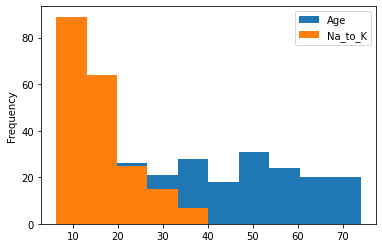

In [ ]:
data.plot.hist() # Histogram for each column

<AxesSubplot:ylabel='Frequency'>

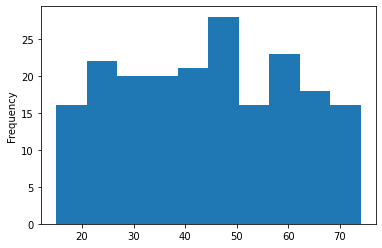

In [ ]:
data.Age.plot.hist() # Histogram for Age column

## 14.2. Scatter Plot

<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

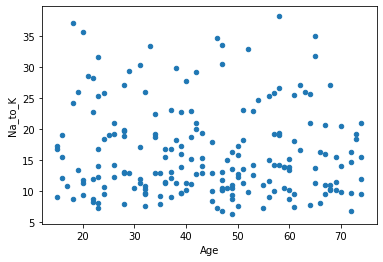

In [ ]:
data.plot.scatter(x='Age',y='Na_to_K')

# References:
1. [Rstudio Data Wrangling ](https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf) Written by Irv Lustig
2. For tidy data: https://www.youtube.com/watch?v=49PKysycCGc